In [1]:
# Sneha Dubey
# Dr. Cui
# CSEN 240
# 27 October 2024

In [2]:
# Homework 2 Problem 2

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load & Preprocess the Data

In [5]:
file = "./Iris.xlsx"
originalData = pd.read_excel(file)

originalData.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
cleanData = originalData.drop("Id", axis = 1)

cleanData['Species'] = cleanData['Species'].astype('category')
cleanData['encodedSpecies'] = cleanData['Species'].cat.codes
cleanData = cleanData.drop("Species", axis = 1)

cleanData

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  encodedSpecies
0              5.1           3.5            1.4           0.2               0
1              4.9           3.0            1.4           0.2               0
2              4.7           3.2            1.3           0.2               0
3              4.6           3.1            1.5           0.2               0
4              5.0           3.6            1.4           0.2               0
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3               2
146            6.3           2.5            5.0           1.9               2
147            6.5           3.0            5.2           2.0               2
148            6.2           3.4            5.4           2.3               2
149            5.9           3.0            5.1           1.8               2

[150 rows x 5 columns]

In [7]:
# Step 2: Implement K-Means CLustering

In [8]:
K = 3
epsilon = 10 ** (-5)

In [9]:
def euclideanDistance(data, centers):
    return np.sqrt(np.sum((data - centers) ** 2, axis=1))

def objectiveFunction(data, labels, centers):
    J = 0
    for i in range(K):
        objectsInCluster = data[labels == i]
        J += np.sum((objectsInCluster - centers[i]) ** 2)
    return J

In [10]:
np.random.seed(0)
centers = cleanData.loc[np.random.choice(cleanData.shape[0], K, replace=False)]

centers

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  encodedSpecies
114            5.8           2.8            5.1           2.4               2
62             6.0           2.2            4.0           1.0               1
33             5.5           4.2            1.4           0.2               0

In [11]:
cleanDataArray = cleanData.to_numpy()
centersArray = centers.to_numpy()

In [12]:
objectiveFunctionValues = []
iterations = []

currentIteration = 0

while True:
    distances = np.array([euclideanDistance(cleanDataArray, center) for center in centersArray])
    labels = np.argmin(distances, axis=0)
    
    updatedCenters = np.array([cleanDataArray[labels == label].mean(axis=0) for label in range(0, K)])

    currentJ = objectiveFunction(cleanDataArray, labels, updatedCenters)
    objectiveFunctionValues.append(currentJ)
    iterations.append(currentIteration)
    
    if currentIteration > 1 and abs(objectiveFunctionValues[-2] - objectiveFunctionValues[-1]) < epsilon:
        print("Converged after", currentIteration, "iterations")
        break
    
    centersArray = updatedCenters
    currentIteration += 1

Converged after 2 iterations


In [13]:
# Step 3: Plot the Results

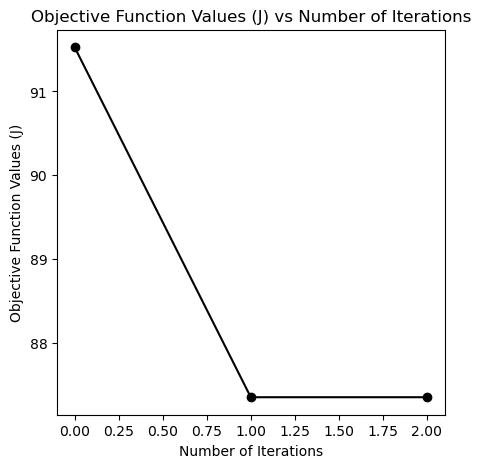

In [14]:
plt.figure(figsize=(5, 5))
plt.plot(iterations, objectiveFunctionValues, marker='o', color='black')
plt.title('Objective Function Values (J) vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Values (J)')
plt.show()

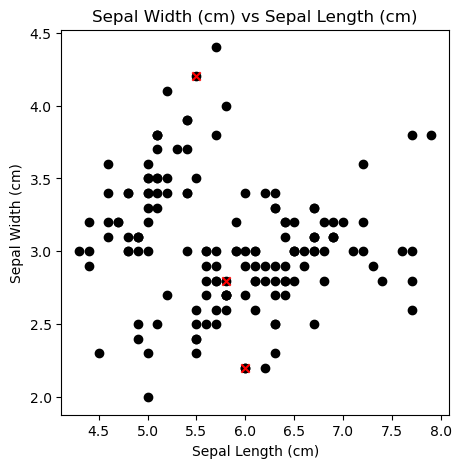

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(cleanData['SepalLengthCm'], cleanData['SepalWidthCm'], marker='o', color='black')
plt.scatter(centers['SepalLengthCm'], centers['SepalWidthCm'], marker='x', color='red')
plt.title('Sepal Width (cm) vs Sepal Length (cm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.show()

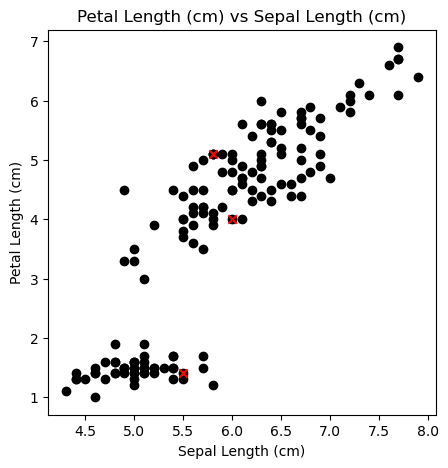

In [16]:
plt.figure(figsize=(5, 5))
plt.scatter(cleanData['SepalLengthCm'], cleanData['PetalLengthCm'], marker='o', color='black')
plt.scatter(centers['SepalLengthCm'], centers['PetalLengthCm'], marker='x', color='red')
plt.title('Petal Length (cm) vs Sepal Length (cm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()

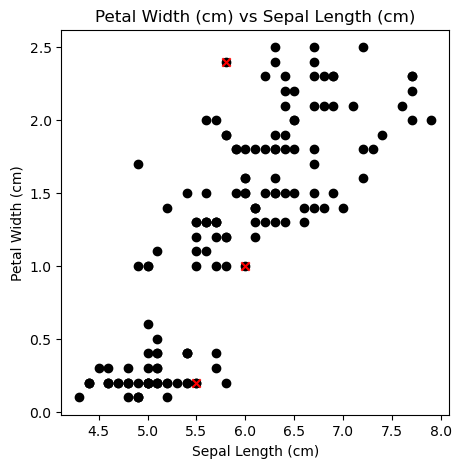

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(cleanData['SepalLengthCm'], cleanData['PetalWidthCm'], marker='o', color='black')
plt.scatter(centers['SepalLengthCm'], centers['PetalWidthCm'], marker='x', color='red')
plt.title('Petal Width (cm) vs Sepal Length (cm)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()

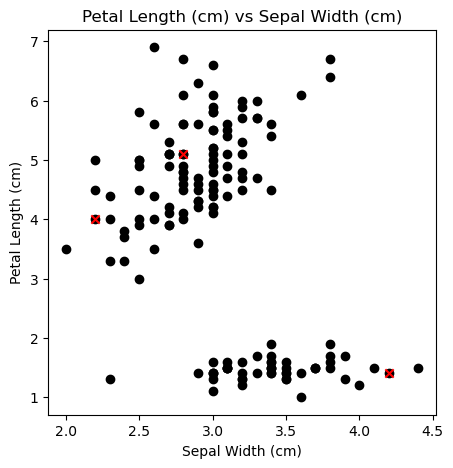

In [18]:
plt.figure(figsize=(5, 5))
plt.scatter(cleanData['SepalWidthCm'], cleanData['PetalLengthCm'], marker='o', color='black')
plt.scatter(centers['SepalWidthCm'], centers['PetalLengthCm'], marker='x', color='red')
plt.title('Petal Length (cm) vs Sepal Width (cm)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()

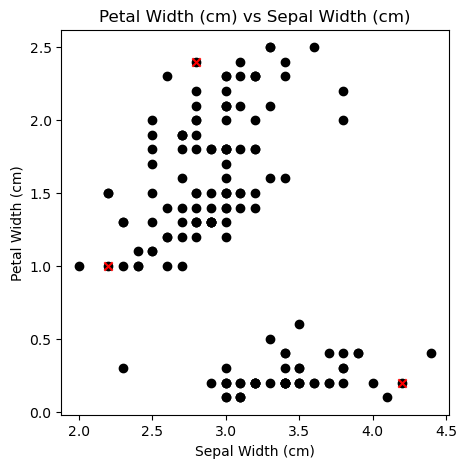

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(cleanData['SepalWidthCm'], cleanData['PetalWidthCm'], marker='o', color='black')
plt.scatter(centers['SepalWidthCm'], centers['PetalWidthCm'], marker='x', color='red')
plt.title('Petal Width (cm) vs Sepal Width (cm)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()

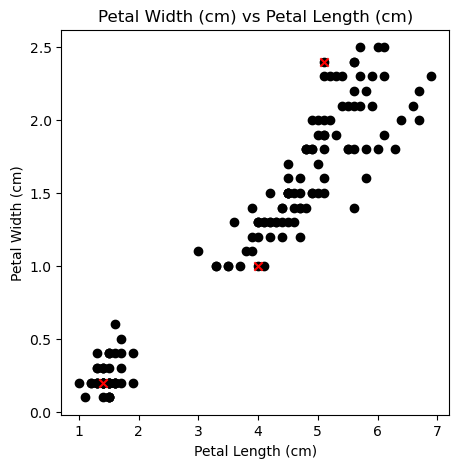

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(cleanData['PetalLengthCm'], cleanData['PetalWidthCm'], marker='o', color='black')
plt.scatter(centers['PetalLengthCm'], centers['PetalWidthCm'], marker='x', color='red')
plt.title('Petal Width (cm) vs Petal Length (cm)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()